In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 100
plt.style.use("bmh")

In [4]:
os.chdir("..")

In [5]:
df = pd.read_csv("data/precleaned.csv", index_col=0)

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.head()

,wiek,zawod,stan_cywilny,wyksztalcenie,ma_kredyt,kredyt_mieszkaniowy,ma_pozyczke,sposob_kontaktu,miesiac,dl_polaczenia,liczba_polaczen_aktualnej_kampanii,liczba_dni_od_ost_kontaktu,liczba_polaczen_przed_aktualna_kampania,wynik_poprzedniej_kampanii,wsk_zmien_zatrudnienia,wsk_cen_konsum,wsk_zauf_konsum,euribor3m,liczba_pracownikow,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Quickstart
1. [Import danych](#Import-danych-i-podstawowe-informacje-o-zbiorze)
2. [Wykresy](#Wykresy-i-wnioski-przyblizajace-zbior-danych)
3. [Potencjalne pytania](#Pytania,-ktore-moga-potencjalnie-naprowadzic-na-cechy,-ktore-maja-wieksze-znaczenie-dla-predykcji-targetu)
4. [Key takeaways](#Key-takeaways)

# Detekcja wartosci odstajacych

In [7]:
df.describe()

,wiek,dl_polaczenia,liczba_polaczen_aktualnej_kampanii,liczba_dni_od_ost_kontaktu,liczba_polaczen_przed_aktualna_kampania,wsk_zmien_zatrudnienia,wsk_cen_konsum,wsk_zauf_konsum,euribor3m,liczba_pracownikow,target
count,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000
mean,40.023679,258.319150,2.567917,962.463922,0.173018,0.081897,93.575710,-40.502963,3.621263,5167.034288,0.112665
std,10.420778,259.307587,2.770341,186.939285,0.494970,1.570894,0.578842,4.627872,1.734447,72.252145,0.316187
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## Cechy numeryczne

In [8]:
subset = df.select_dtypes(exclude="object")

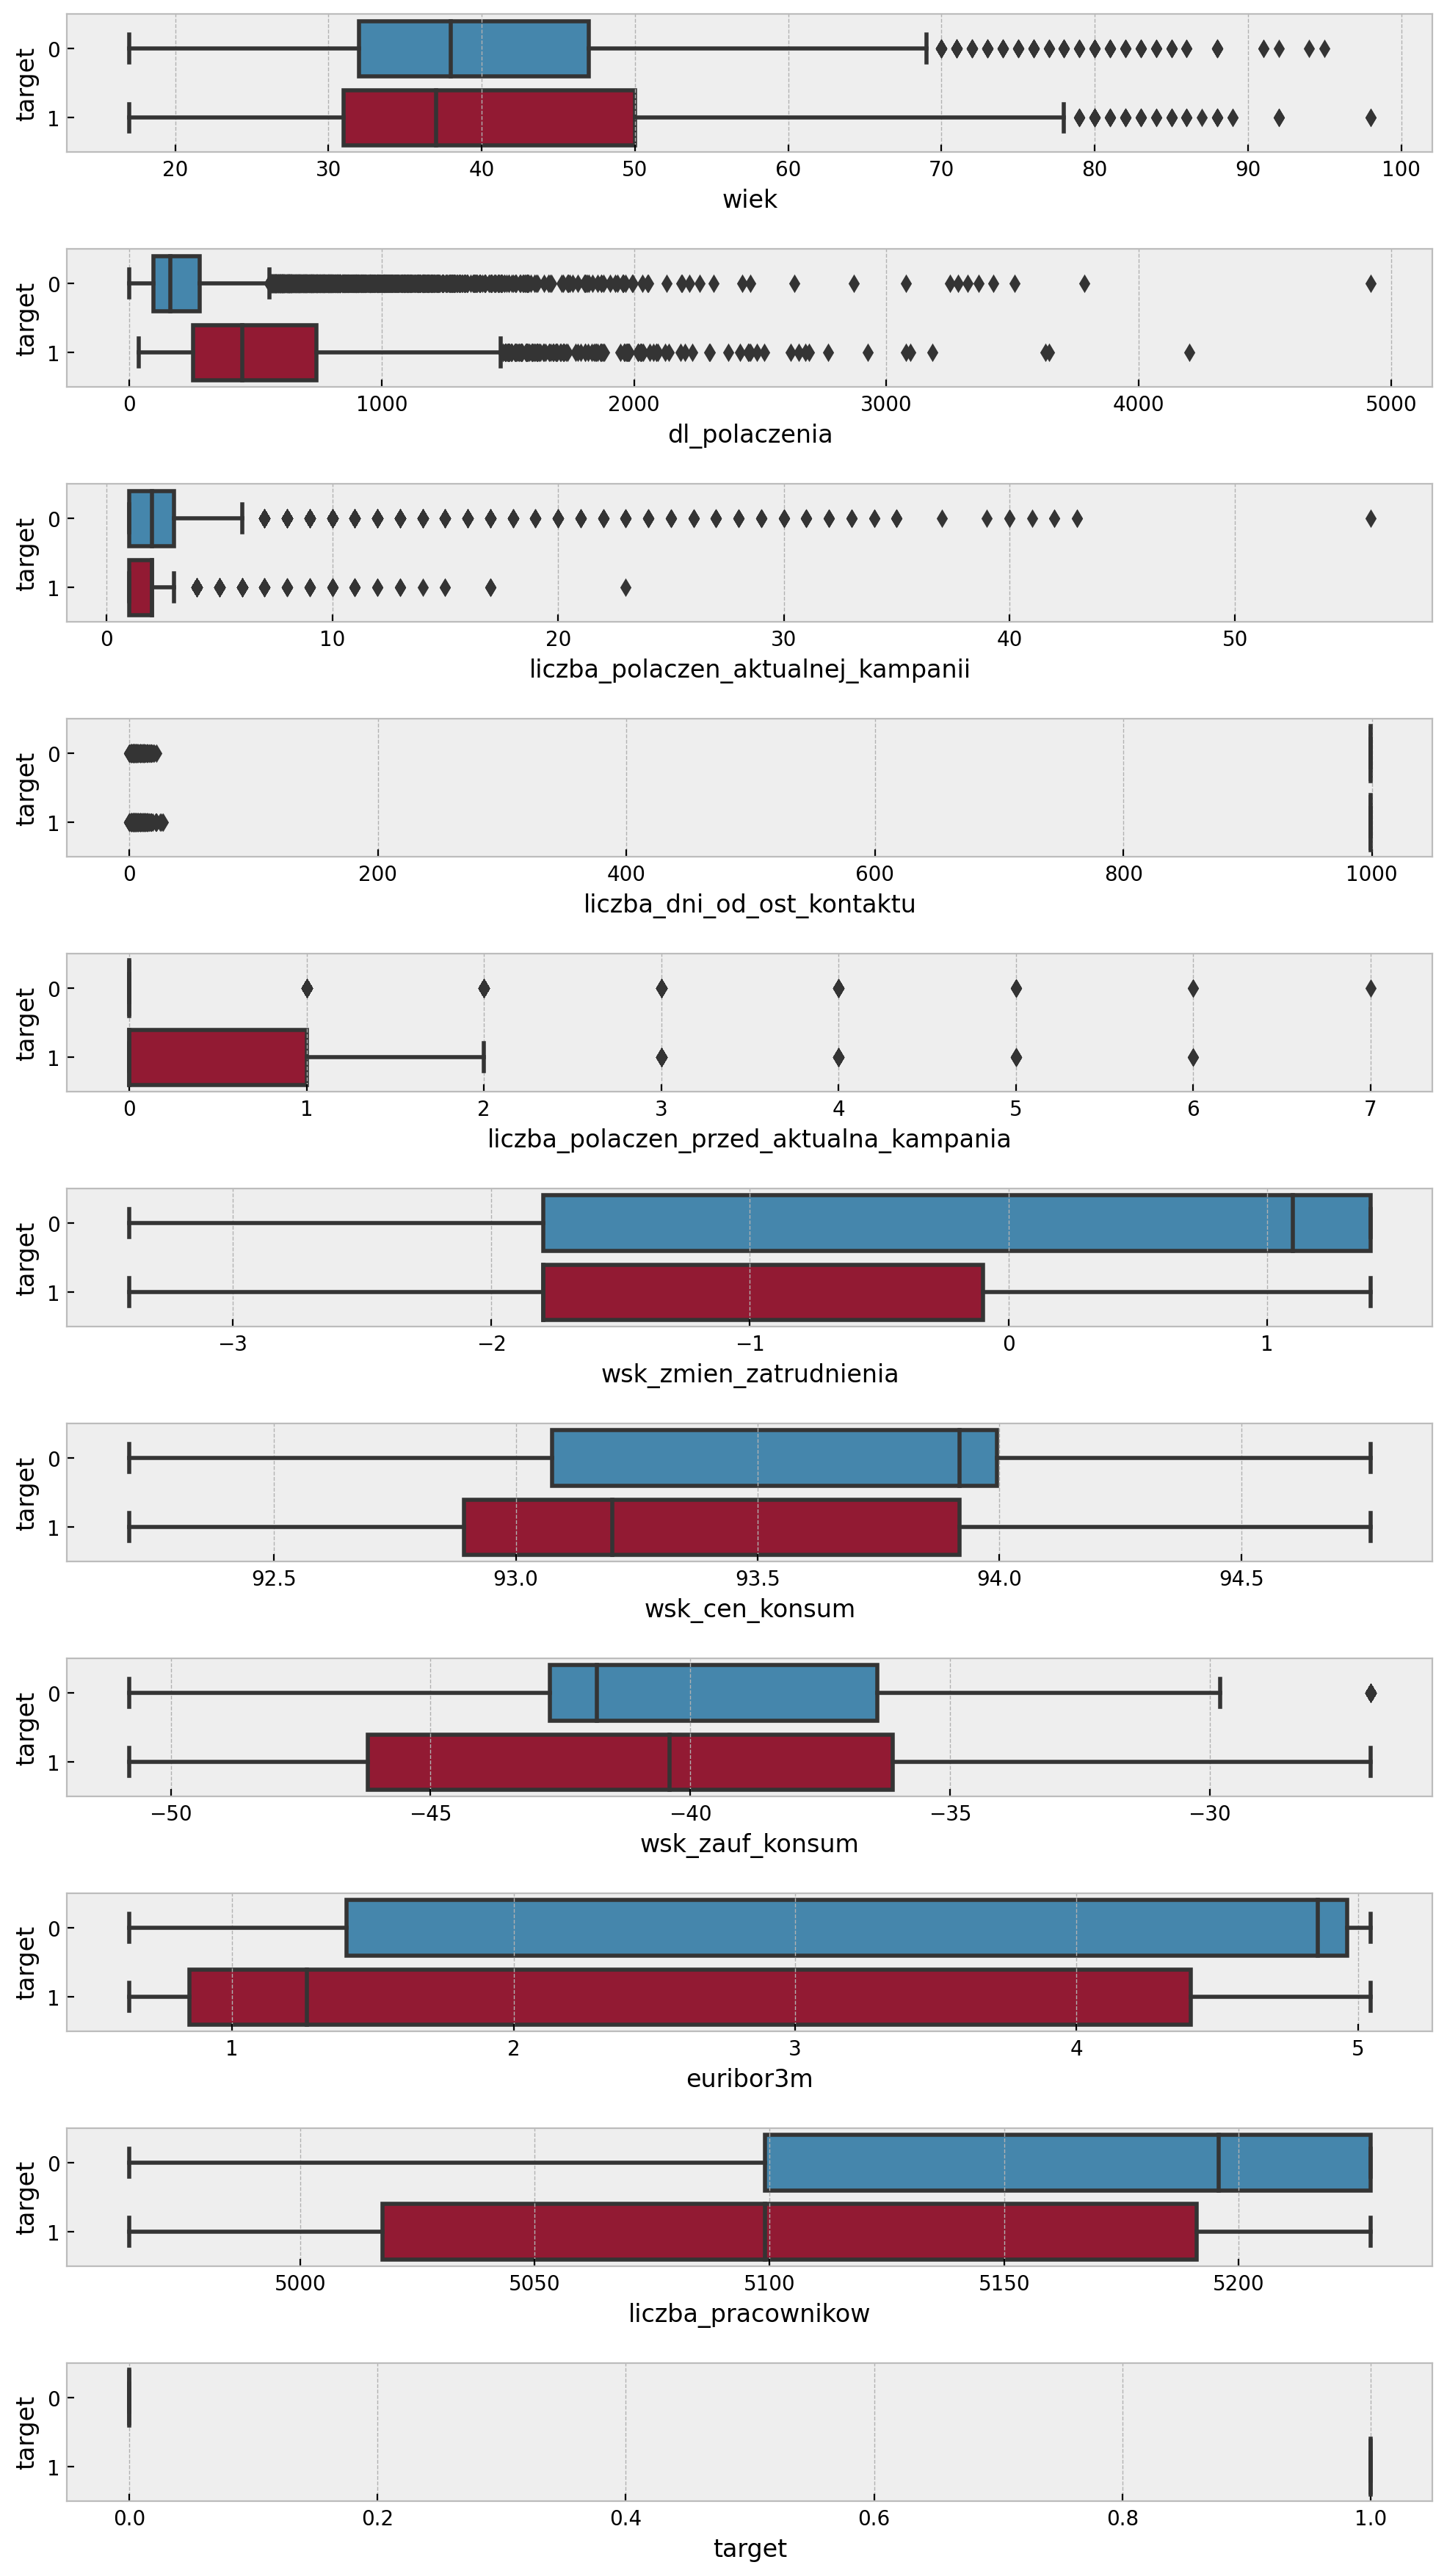

In [9]:
fig, axs = plt.subplots(len(subset.columns), dpi=200, figsize=(12, 22))

for ind, feature in enumerate(subset.columns):
    sns.boxplot(data=df, x=df[feature], y="target", ax=axs[ind], orient="h")

plt.subplots_adjust(hspace=0.7)

#### Jakies spostrzezenia dla tych cech gdzie cos ciekawego widac
-
-
-

### wiek

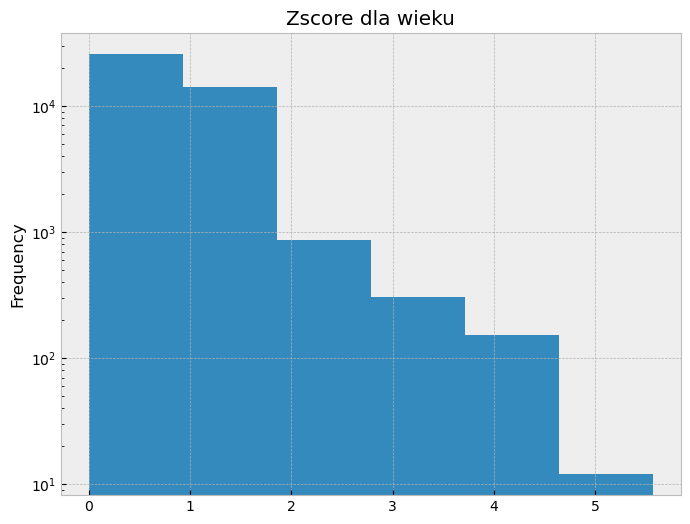

In [10]:
wiek_subset = np.abs(stats.zscore(df["wiek"]))
wiek_subset.plot(kind="hist", bins=6, logy=True, title="Zscore dla wieku");

In [11]:
threshold = 3
df = df.iloc[np.where(wiek_subset <= threshold)[0]]

### dl_polaczenia

<AxesSubplot:xlabel='dl_polaczenia', ylabel='Count'>

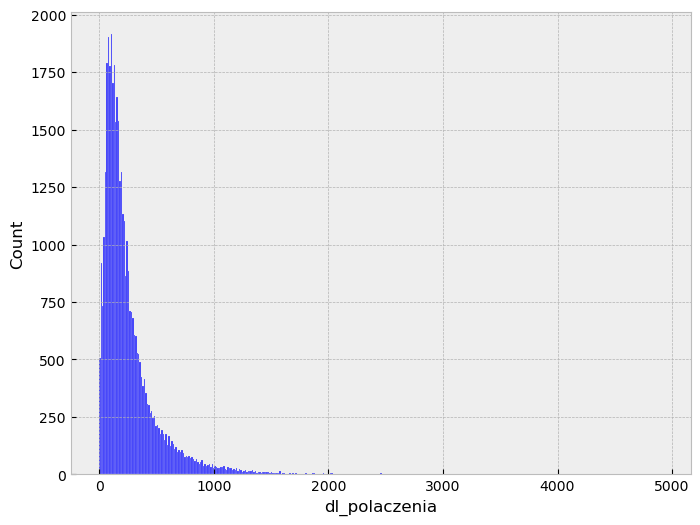

In [12]:
sns.histplot(data=df.dl_polaczenia)

#### Jakies spostrzezenia
-
-
-

In [13]:
df[(df.dl_polaczenia <= 0)]

,wiek,zawod,stan_cywilny,wyksztalcenie,ma_kredyt,kredyt_mieszkaniowy,ma_pozyczke,sposob_kontaktu,miesiac,dl_polaczenia,liczba_polaczen_aktualnej_kampanii,liczba_dni_od_ost_kontaktu,liczba_polaczen_przed_aktualna_kampania,wynik_poprzedniej_kampanii,wsk_zmien_zatrudnienia,wsk_cen_konsum,wsk_zauf_konsum,euribor3m,liczba_pracownikow,target
6249,39,admin.,married,high.school,no,yes,no,telephone,may,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
23023,59,management,married,university.degree,no,yes,no,cellular,aug,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
28054,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,0
33004,31,blue-collar,married,basic.9y,no,no,no,cellular,may,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


#### Nie nalezy porzucac tych obserwacji, gdyz sa naturalnym wynikiem rozlaczenia sie klienta z konsultantem

In [14]:
df = df[~(df.dl_polaczenia <= 0)]

In [15]:
subset = stats.boxcox(df["dl_polaczenia"])[0]

#### Sprawdzamy, czy _dl\_polaczenia_, po transformacji ma rozklad normalny.

<AxesSubplot:ylabel='Count'>

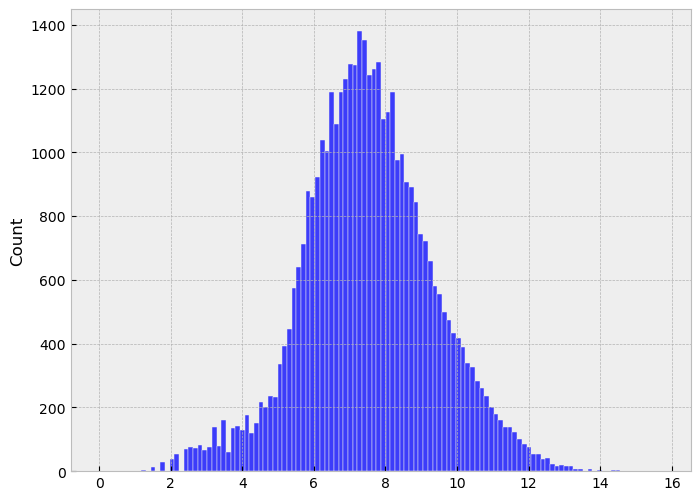

In [16]:
sns.histplot(data=subset);

In [17]:
df[df.dl_polaczenia > 2000].target.value_counts()

1    38
0    22
Name: target, dtype: int64

#### Dlugie rozmowy maja duze znaczenie dla modelu, bo mozna zauwazyc, ze im dluzsze sa rozmowy, tym wieksza szansa na to, ze osoba bedzie zainteresowana depozytem, wiec nie sa to tzw. wartosci odstajace.

#### Kolumna _dl\_polaczenia_ jest jedynie cecha pozwalajaca na walidacje modelu, wiec zostanie ona pominieta.

### liczba_polaczen_aktualnej_kampanii

In [18]:
pd.crosstab(index=df.liczba_polaczen_aktualnej_kampanii, columns=df.target).T

liczba_polaczen_aktualnej_kampanii,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,39,40,41,42,43,56
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,15240,9300,4752,2390,1477,899,589,381,263,212,165,122,88,68,49,50,54,33,26,30,24,17,15,15,8,8,11,8,10,7,7,4,4,3,5,1,1,2,1,2,2,1
1,2193,1166,558,244,117,73,35,16,17,12,12,3,4,1,2,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Na podstawie powyzszego zestawienia moznaby pokusic sie o porzucenie obserwacji, gdzie _liczba\_polaczen\_aktualnej\_kampanii_ przekracza wartosc 11, bo znaczaca wiekszosc takich obserwacji, sprowadza sie do nieudanej proby namowienia klienta do depozytu.

In [6]:
df = df[df.liczba_polaczen_aktualnej_kampanii <= 18]

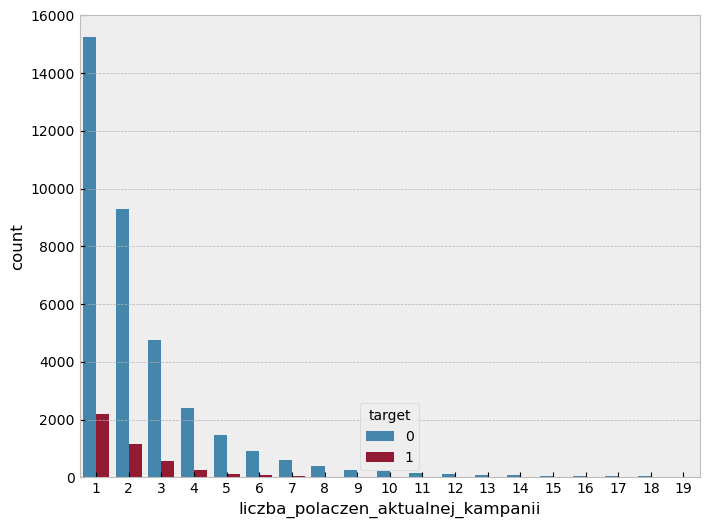

In [19]:
sns.countplot(
    data=df[df.liczba_polaczen_aktualnej_kampanii < 20],
    x="liczba_polaczen_aktualnej_kampanii",
    hue="target",
);

### liczba_dni_od_ost_kontaktu

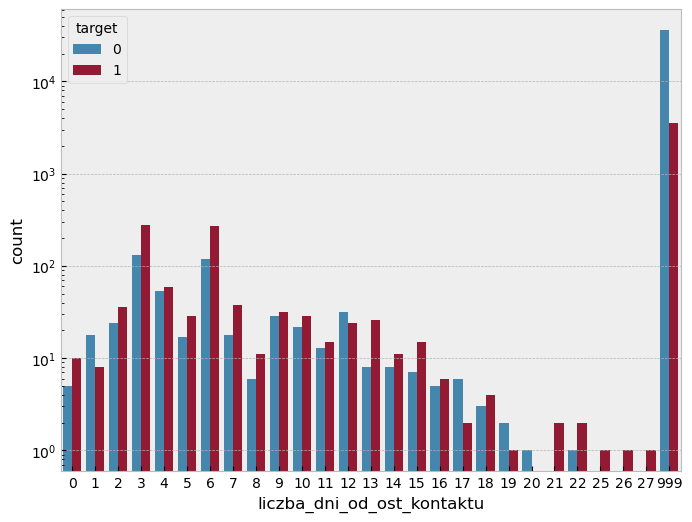

In [20]:
sns.countplot(data=df, x="liczba_dni_od_ost_kontaktu", hue="target")
plt.yscale("log")

#### Jako ze jest to skala logarytmiczna, moze sie wydawac ze roznica miedzy iloscia ludzi, ktorzy zdecydowali sie na depozyt, a tymi ktorzy sie na to nie zdecydowali, jest minimalna, jednak w rzeczywistosci jest ona bardzo duza.

In [21]:
df[df.liczba_dni_od_ost_kontaktu == 999].target.value_counts()

0    35816
1     3552
Name: target, dtype: int64

### WAZNE! Zastanowic sie co zrobic z tymi 999, czy zamienic je na pd.NA? Tutaj 999 oznacza, ze po prostu nie bylo wczesniejszego kontaktu z klientem, w sensie nie kontaktowano sie z nim w ramach poprzedniej kampanii, oraz jest to pierwsza kampania, w ktorej sie z nim kontaktujemy.

### liczba_polaczen_przed_aktualna_kampania

In [22]:
ctab = pd.crosstab(df.target, df.liczba_polaczen_przed_aktualna_kampania).T
ctab

target,0,1
liczba_polaczen_przed_aktualna_kampania,,
0,32290,3051
1,3548,913
2,386,327
3,82,121
4,30,31
5,5,13
6,2,2
7,1,0


#### Co ciekawe, im dokonano wiecej polaczen przed aktualna kampania, to wiekszy procent osob decydowal sie na depozyt.

In [23]:
ctab["%"] = ctab[1] / ctab.sum(axis=1)

In [24]:
ctab

target,0,1,%
liczba_polaczen_przed_aktualna_kampania,,,
0,32290,3051,0.086330
1,3548,913,0.204663
2,386,327,0.458626
3,82,121,0.596059
4,30,31,0.508197
5,5,13,0.722222
6,2,2,0.500000
7,1,0,0.000000


<AxesSubplot:xlabel='liczba_polaczen_przed_aktualna_kampania', ylabel='count'>

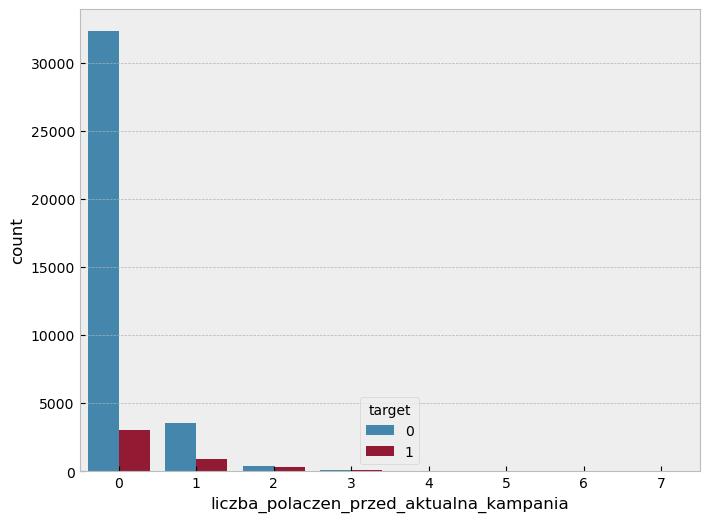

In [25]:
sns.countplot(data=df, x=df.liczba_polaczen_przed_aktualna_kampania, hue="target")

In [9]:
df = df[df.liczba_polaczen_przed_aktualna_kampania <= 3]

### Wspolczynniki rynkowe

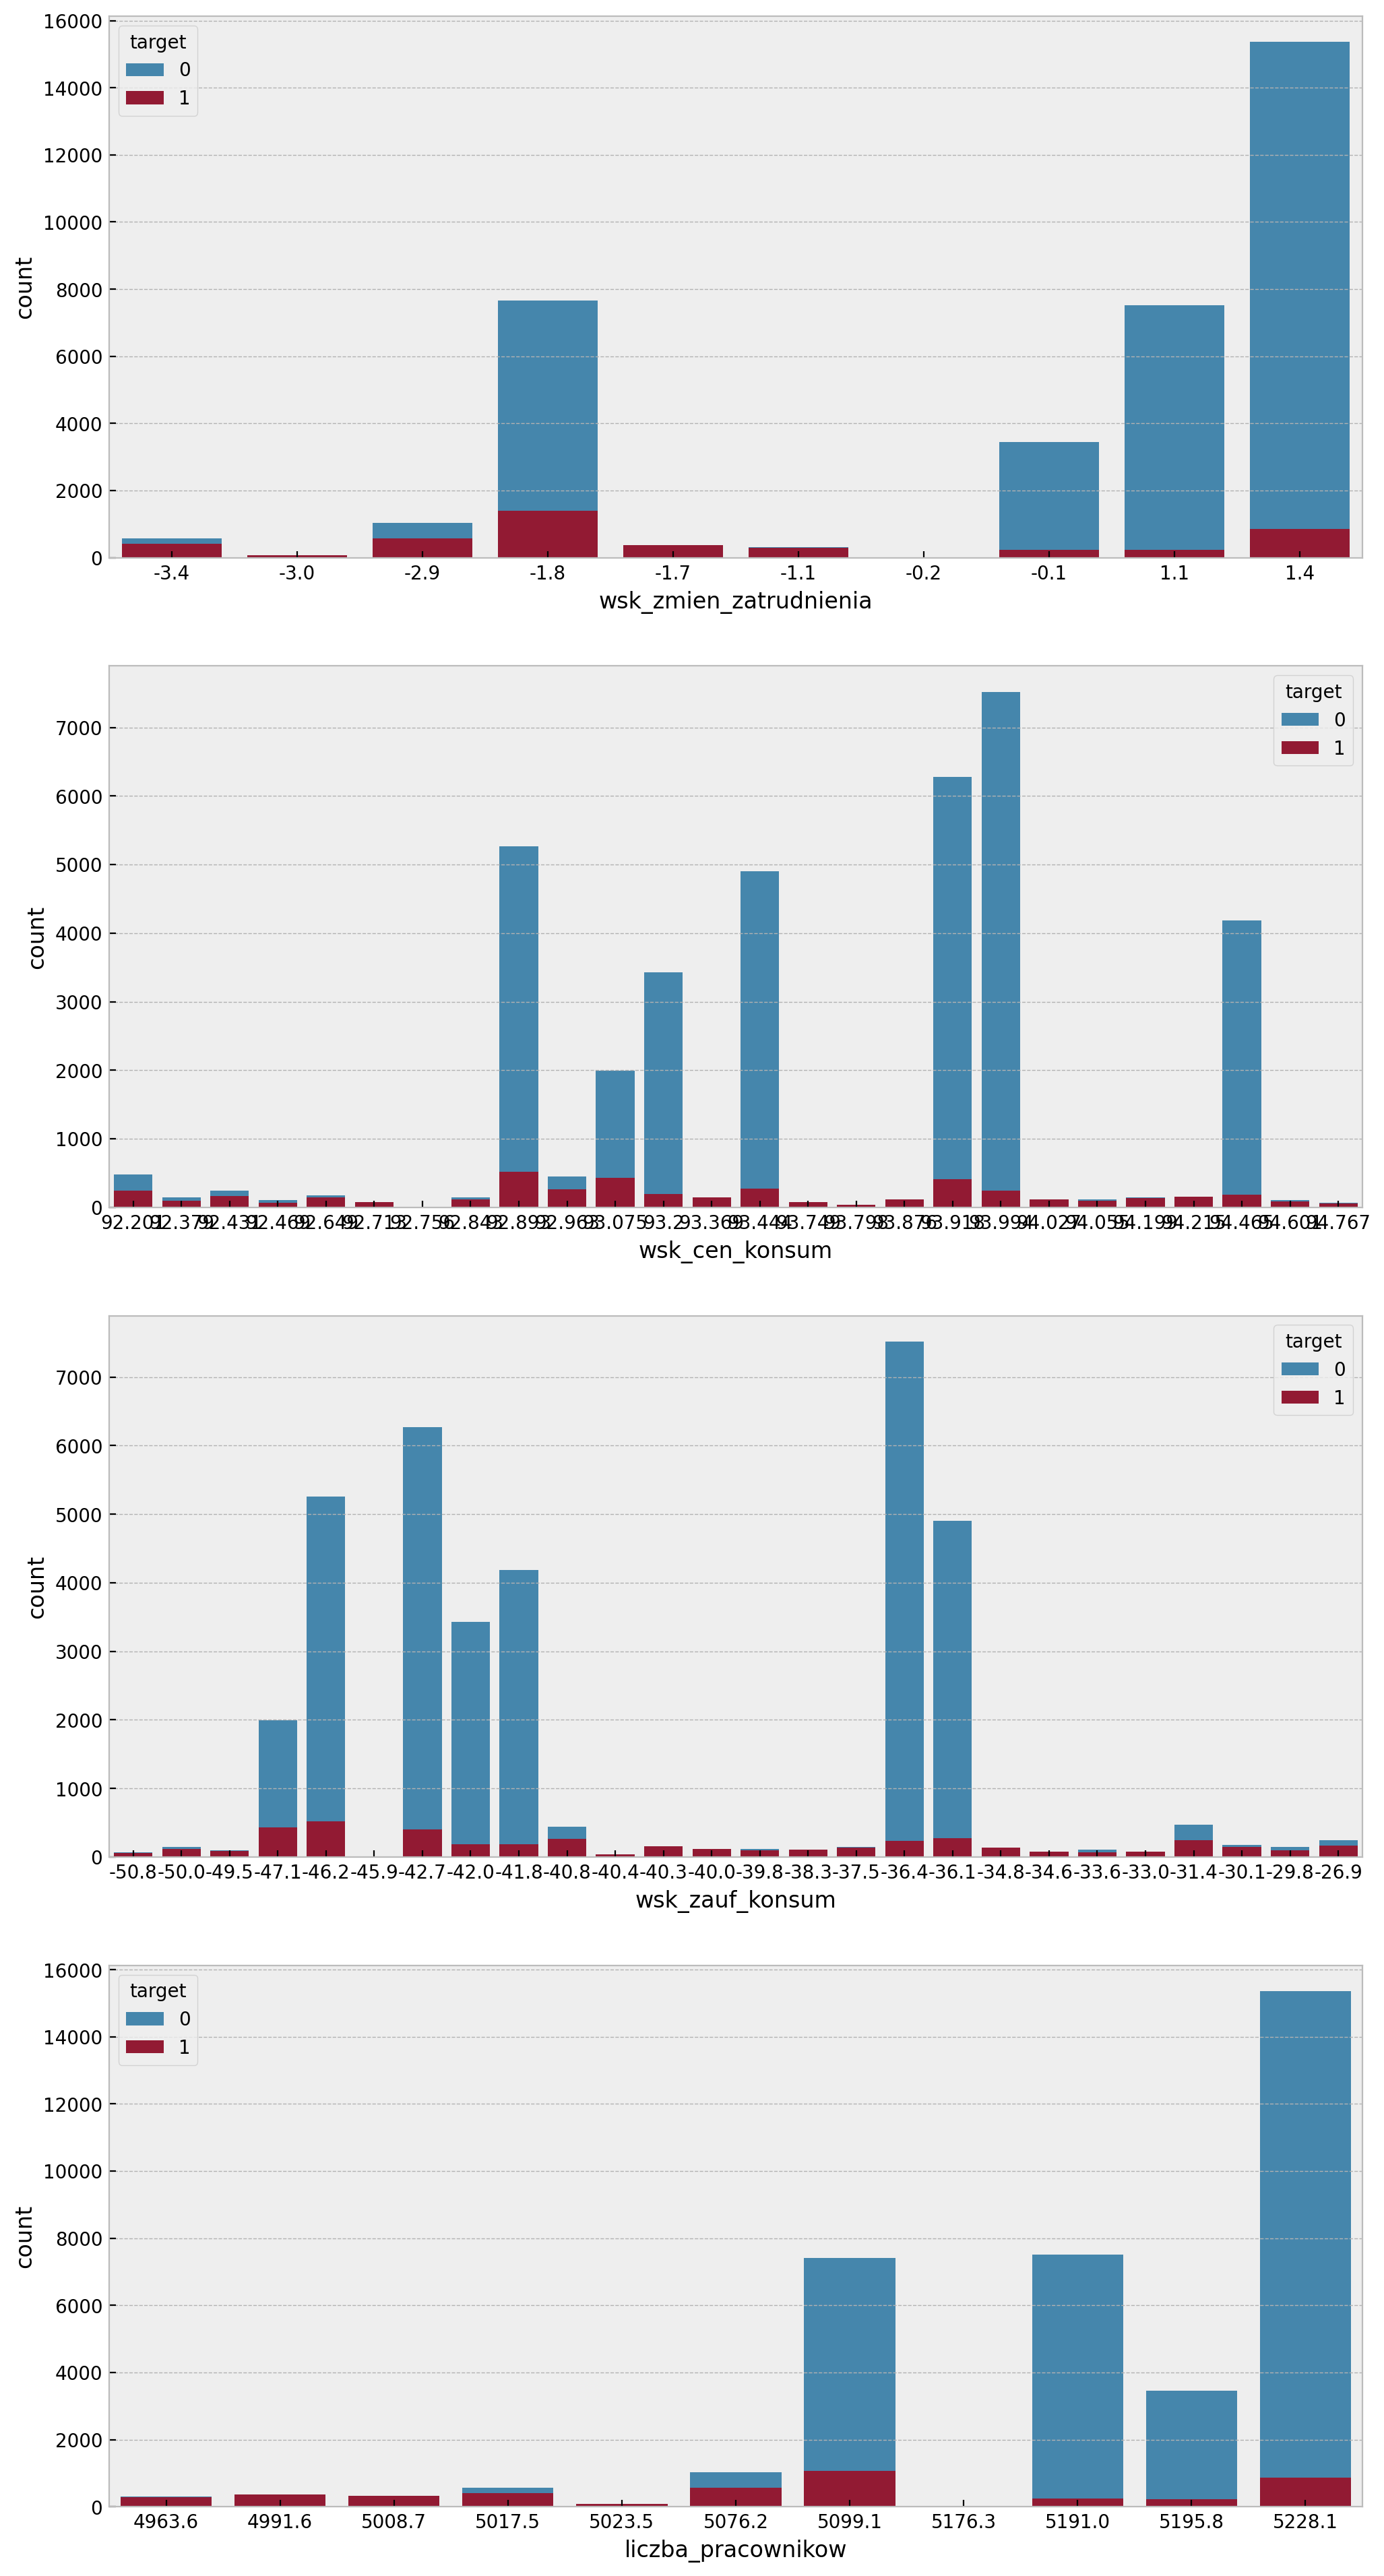

In [27]:
wspolczynniki = (
    "wsk_zmien_zatrudnienia",
    "wsk_cen_konsum",
    "wsk_zauf_konsum",
    "liczba_pracownikow",
)
fig, axs = plt.subplots(len(wspolczynniki), figsize=(12, 24), dpi=200)

for ind, wsp in enumerate(wspolczynniki):
    sns.countplot(
        data=df,
        x=df[wsp],
        ax=axs[ind],
        hue="target",
        dodge=False,
    )

#### Jakies spostrzezenia
-
-
-

In [28]:
pd.crosstab([df.liczba_pracownikow, df.wsk_zmien_zatrudnienia], df.target)

,target,0,1
liczba_pracownikow,wsk_zmien_zatrudnienia,,
4963.6,-1.1,314,287
4991.6,-1.7,351,367
5008.7,-1.8,257,334
5017.5,-3.4,570,412
5023.5,-3.0,75,79
5076.2,-2.9,1033,570
5099.1,-1.8,7404,1070
5176.3,-0.2,9,1
5191.0,1.1,7520,240


#### euribor3m

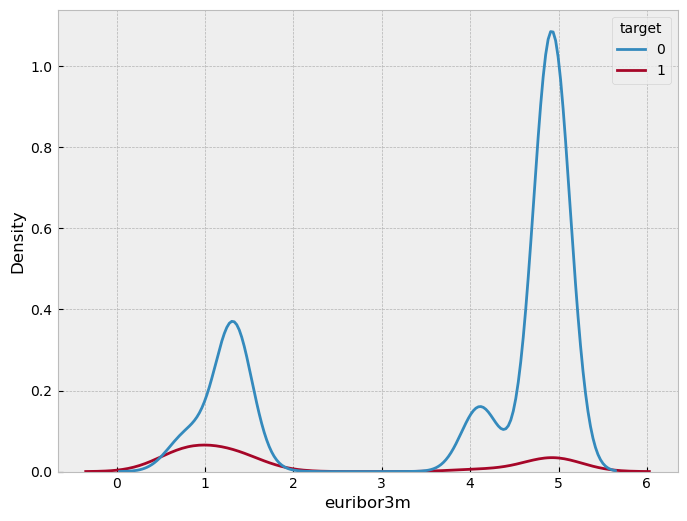

In [29]:
sns.kdeplot(
    data=df,
    x="euribor3m",
    hue="target",
);

#### Jakies spostrzezenia
-
-
-

In [30]:
ctab = (
    pd.crosstab(df.euribor3m, df.target)
    .sort_values(by=[0, 1], ascending=False)
    .head(100)
)
ctab["%"] = ctab[1] / ctab.sum(axis=1) * 100

In [31]:
ctab

target,0,1,%
euribor3m,,,
4.857,2795,72,2.511336
4.962,2467,144,5.515128
4.963,2361,126,5.066345
4.961,1812,90,4.731861
4.856,1177,32,2.646816
...,...,...,...
0.849,17,14,45.161290
0.854,17,9,34.615385
1.048,17,5,22.727273


In [32]:
ctab = (
    pd.crosstab(df.euribor3m, df.target)
    .sort_values(by=[1, 0], ascending=False)
    .head(100)
)
ctab["%"] = ctab[1] / ctab.sum(axis=1) * 100
ctab = ctab.sort_values(by="%", ascending=False)

In [33]:
ctab

target,0,1,%
euribor3m,,,
0.697,2,15,88.235294
0.652,8,26,76.470588
0.900,7,20,74.074074
0.733,5,13,72.222222
0.655,10,23,69.696970
...,...,...,...
4.191,591,19,3.114754
4.153,670,19,2.757620
4.856,1177,32,2.646816


<AxesSubplot:xlabel='euribor3m', ylabel='%'>

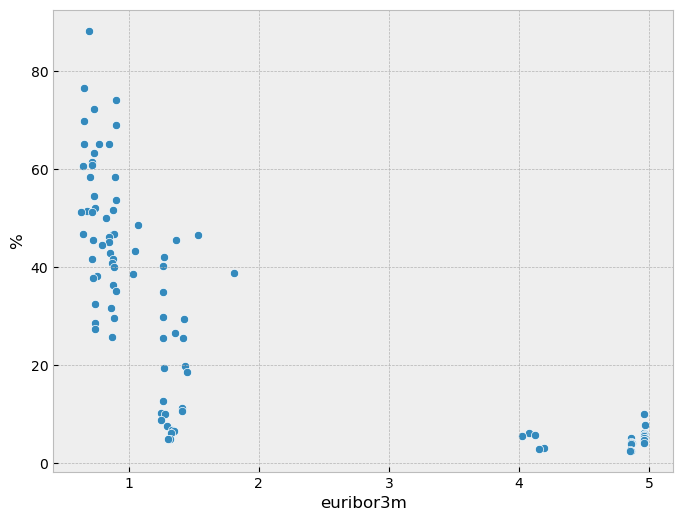

In [34]:
sns.scatterplot(data=ctab, x=ctab.index, y="%")

#### Im nizsza stopa procentowa, tym wiekszy % osob chce dokonac depozytu.

## Dane kategoryczne

W tej czesci skupimy sie na obserwacjach o wartosciach _unknown_.

In [35]:
subset = df.select_dtypes(include="object")

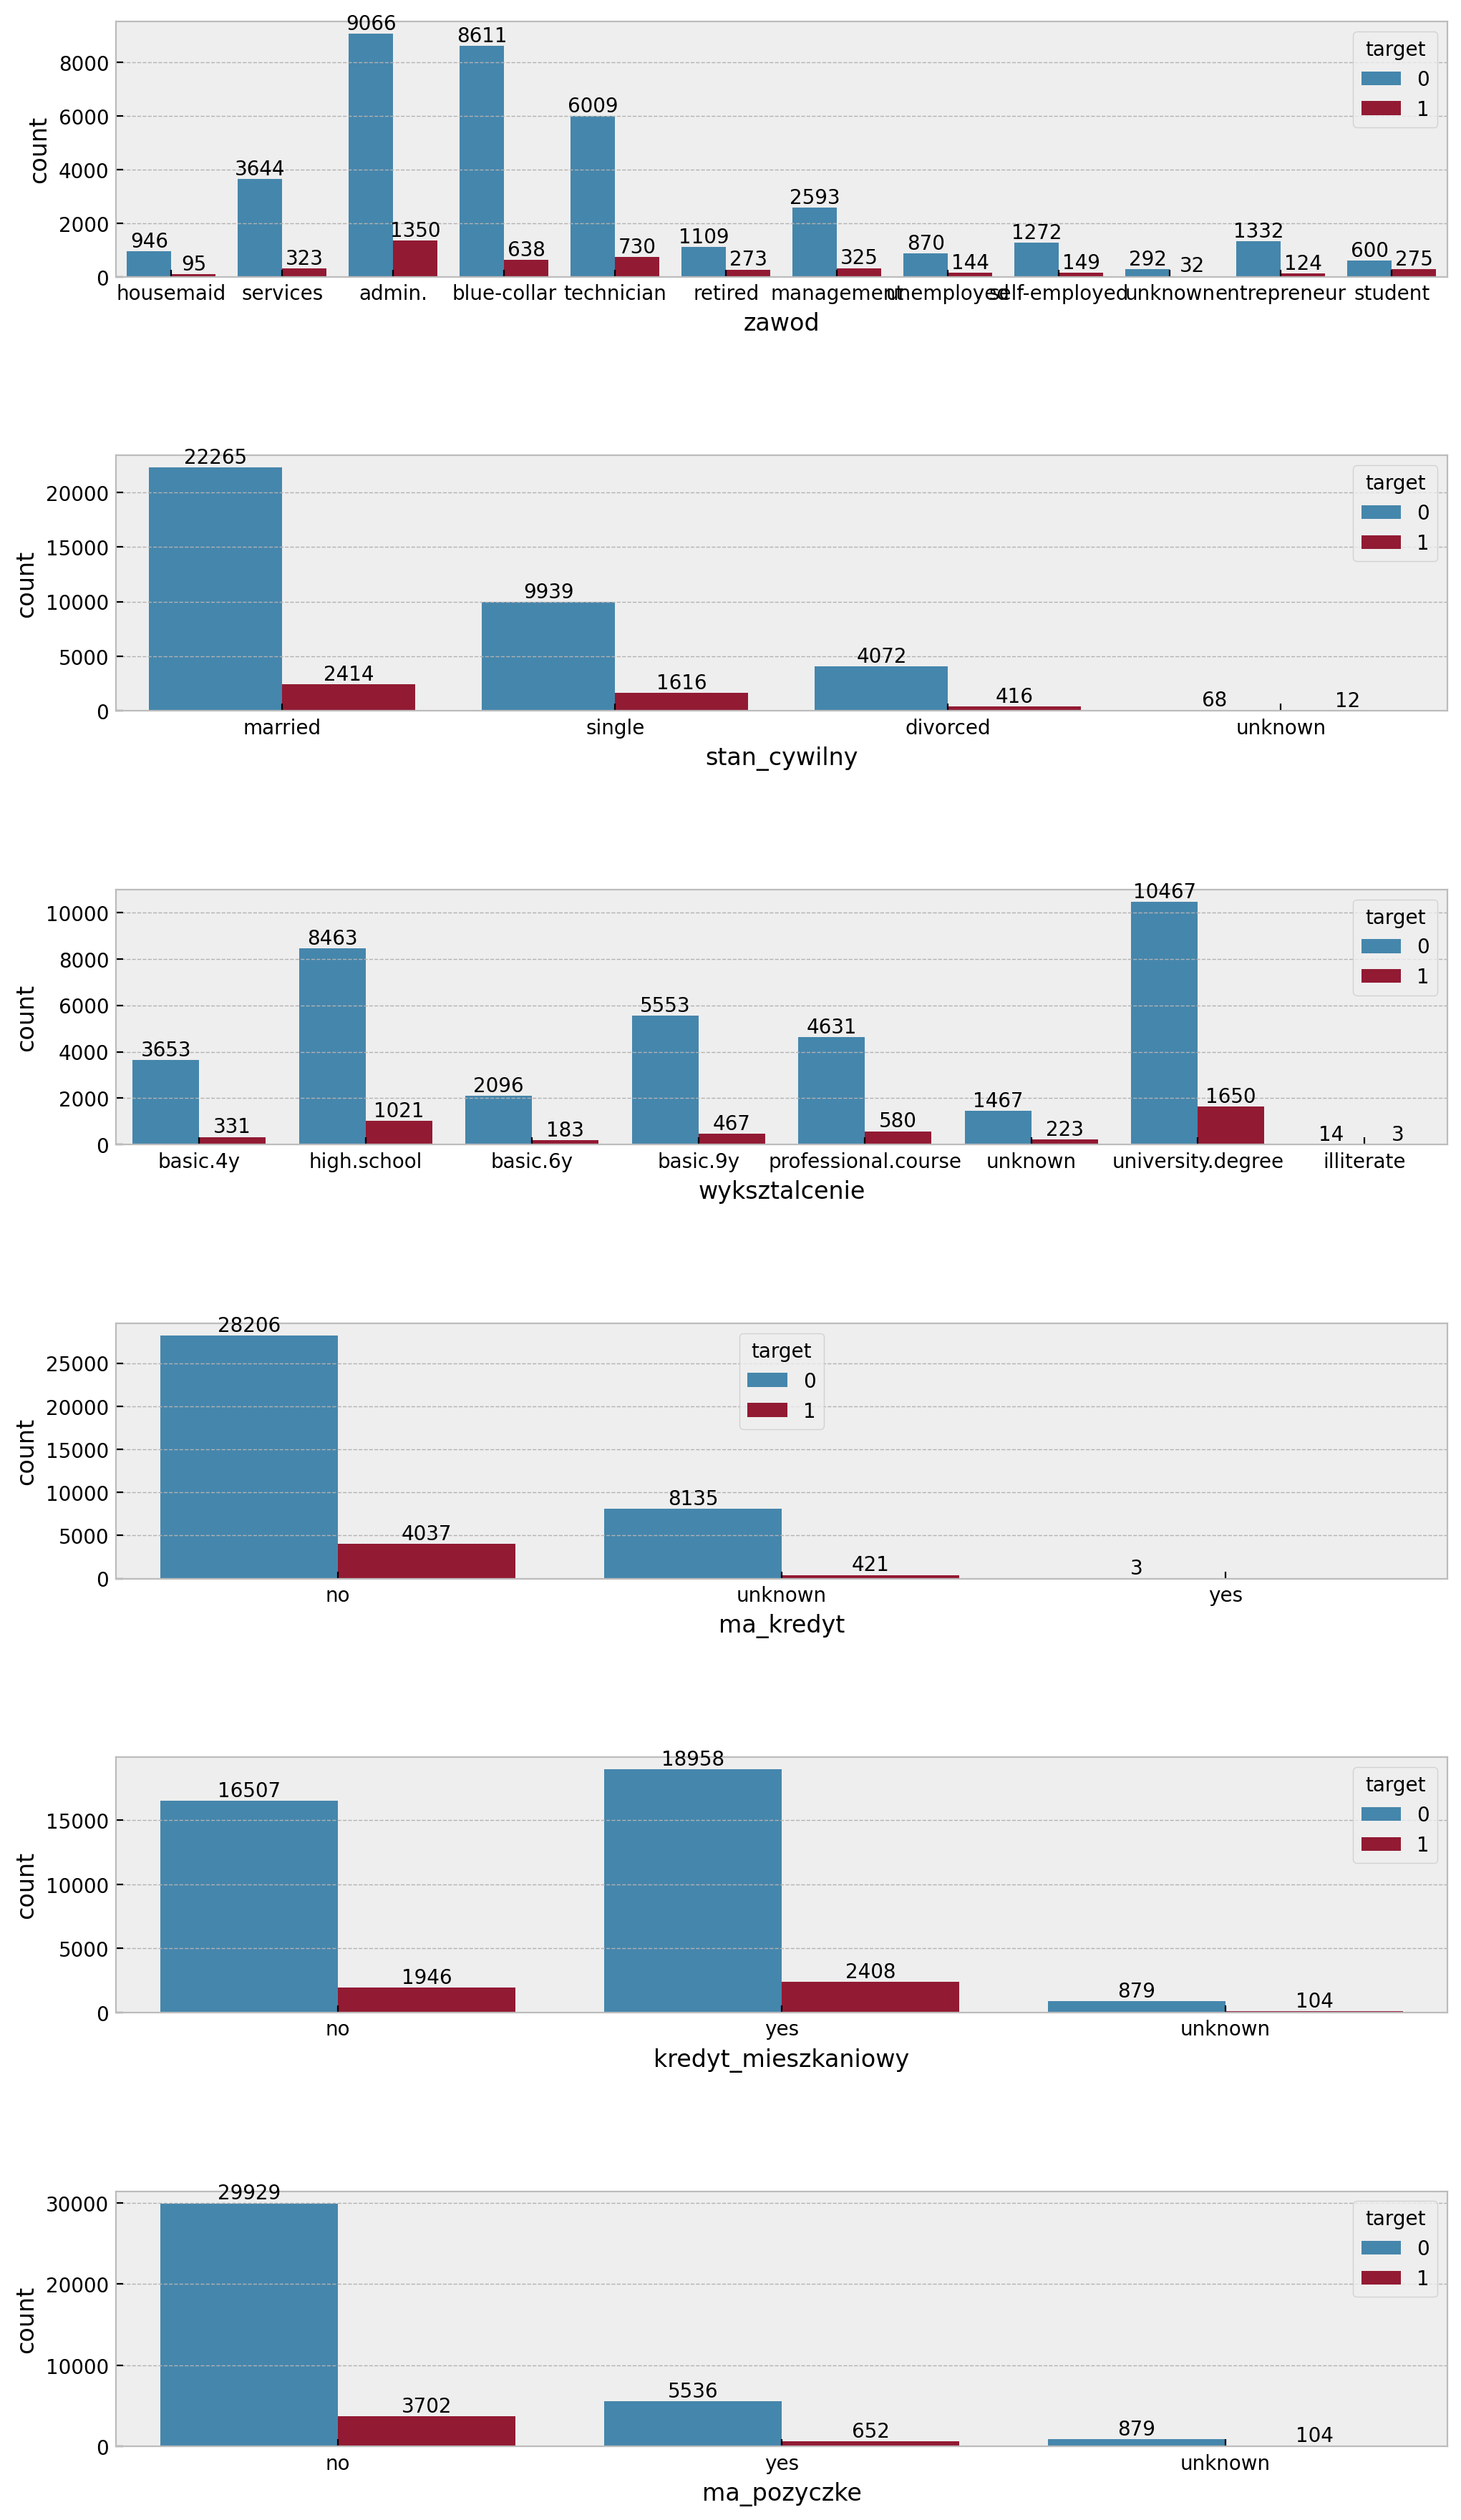

In [36]:
fig, axs = plt.subplots(len(subset.columns) - 3, dpi=200, figsize=(12, 22))

for ind, feature in enumerate(subset.columns):
    if "unknown" in subset[feature].values:
        sns.countplot(data=df, x=df[feature], hue="target", ax=axs[ind], orient="h")
        axs[ind].bar_label(axs[ind].containers[0])
        axs[ind].bar_label(axs[ind].containers[1])
plt.subplots_adjust(hspace=0.7)

### Aby uogolnic model, moznaby zmapowac wartosci z klasy _unknown_ do innych, odpowiadajacych obserwacji klas, za pomoca algorytmu klasyfikujacego.

#### Jakies spostrzezenia
-
-
-

#### Obserwacje o wartosciach _unknown_, jak i _999_ (dla cechy _czas\_od\_ostatniego\_polaczenia_) zostana obsluzeone w nastepnym notebook\'u (3\_feature\_engineering)